In [37]:
%load_ext autoreload
%autoreload 2

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [39]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [40]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [41]:
from llm_toolkit.logical_reasoning_utils import *

In [42]:
model_name = "internlm2_5-7b-chat-1m"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [43]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   text                                                              3000 non-null   object
 1   label                                                             3000 non-null   object
 2   title                                                             3000 non-null   object
 3   puzzle                                                            3000 non-null   object
 4   truth                                                             3000 non-null   object
 5   internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf                 3000 non-null   object
 6   internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf   3000 non-null   object
 7   internlm/internlm2_5-7b-chat-1m/checkpoint

In [44]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/shots-00',
 'internlm/internlm2_5-7b-chat-1m/shots-10',
 'internlm/internlm2_5-7b-chat-1m/shots-05',
 'internlm/internlm2_5-7b-chat-1m/shots-20',
 'internlm/internlm2_5-7b-ch

In [45]:
perf_df = get_metrics_df(df)
perf_df

columns: ['internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf', 'internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf']


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:499: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ax.plot(


epoch                   model  \
0     0.0  internlm2_5-7b-chat-1m   
1     0.2  internlm2_5-7b-chat-1m   
2     0.4  internlm2_5-7b-chat-1m   
3     0.6  internlm2_5-7b-chat-1m   
4     0.8  internlm2_5-7b-chat-1m   
5     1.0  internlm2_5-7b-chat-1m   
6     1.2  internlm2_5-7b-chat-1m   
7     1.4  internlm2_5-7b-chat-1m   
8     1.6  internlm2_5-7b-chat-1m   
9     1.8  internlm2_5-7b-chat-1m   
10    2.0  internlm2_5-7b-chat-1m   

                                                  run  accuracy  precision  \
0   internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf  0.481333   0.760525   
1   internlm/internlm2_5-7b-chat-1m/checkpoint-35_...  0.784333   0.797765   
2   internlm/internlm2_5-7b-chat-1m/checkpoint-70_...  0.783667   0.799698   
3   internlm/internlm2_5-7b-chat-1m/checkpoint-105...  0.724333   0.817117   
4   internlm/internlm2_5-7b-chat-1m/checkpoint-140...  0.803000   0.803141   
5   internlm/internlm2_5-7b-chat-1m/checkpoint-175...  0.767667   0.810844   
6   internlm/internlm2_5-7b-chat-1m/checkpoint-210...  0.773667   0.809167   
7   internlm/internlm2_5-7b-chat-1m/checkpoint-245...  0.762333   0.806229   
8   internlm/internlm2_5-7b-chat-1m/checkpoint-280...  0.755333   0.808620   
9   internlm/internlm2_5-7b-chat-1m/checkpoint-315...  0.748000   0.817200   
10  internlm/internlm2_5-7b-chat-1m/checkpoint-350...  0.756000   0.812688   

      recall        f1  ratio_valid_classifications  
0   0.481333  0.524452                     0.998667  
1   0.784333  0.786494                     1.000000  
2   0.783667  0.788688                     1.000000  
3   0.724333  0.756580                     1.000000  
4   0.803000  0.802806                     1.000000  
5   0.767667  0.784319                     1.000000  
6   0.773667  0.787687                     1.000000  
7   0.762333  0.777669                     1.000000  
8   0.755333  0.775559                     1.000000  
9   0.748000  0.773991                     1.000000  
10  0.756000  0.777781                     1.000000

0.0: internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf
0.2: internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf
0.4: internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf
0.6: internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf
0.8: internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf
1.0: internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf
1.2: internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf
1.4: internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf
1.6: internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf
1.8: internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf
2.0: internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf


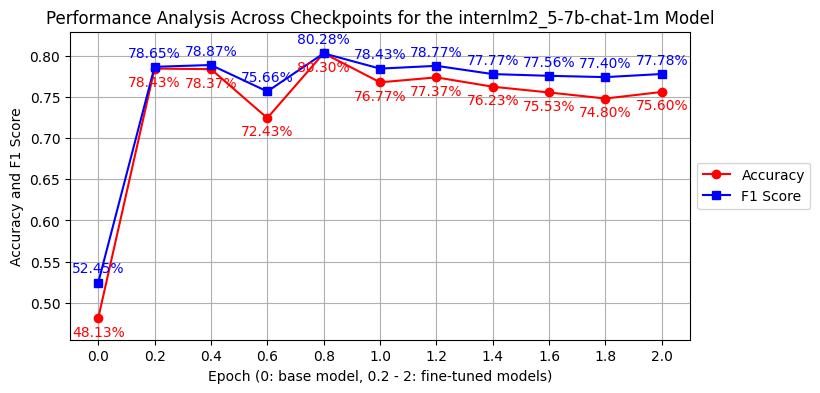

In [46]:
plot_metrics(perf_df, model_name)

In [47]:
perf_df.to_csv(metrics_csv, index=False)

In [48]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['internlm/internlm2_5-7b-chat-1m/shots-00', 'internlm/internlm2_5-7b-chat-1m/shots-05', 'internlm/internlm2_5-7b-chat-1m/shots-10', 'internlm/internlm2_5-7b-chat-1m/shots-20', 'internlm/internlm2_5-7b-chat-1m/shots-30', 'internlm/internlm2_5-7b-chat-1m/shots-40']


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:499: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ax.plot(
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

shots                   model                                       run  \
0     0  internlm2_5-7b-chat-1m  internlm/internlm2_5-7b-chat-1m/shots-00   
1     5  internlm2_5-7b-chat-1m  internlm/internlm2_5-7b-chat-1m/shots-05   
2    10  internlm2_5-7b-chat-1m  internlm/internlm2_5-7b-chat-1m/shots-10   
3    20  internlm2_5-7b-chat-1m  internlm/internlm2_5-7b-chat-1m/shots-20   
4    30  internlm2_5-7b-chat-1m  internlm/internlm2_5-7b-chat-1m/shots-30   
5    40  internlm2_5-7b-chat-1m  internlm/internlm2_5-7b-chat-1m/shots-40   

   accuracy  precision    recall        f1  ratio_valid_classifications  
0  0.481333   0.760525  0.481333  0.524452                     0.998667  
1  0.776333   0.764060  0.776333  0.770088                     0.945333  
2  0.647333   0.728207  0.647333  0.665825                     0.886667  
3  0.673333   0.731461  0.673333  0.676420                     0.821333  
4  0.673667   0.748254  0.673667  0.681045                     0.823667  
5  0.724000   0.756765  0.724000  0.712500                     0.833667

0: internlm/internlm2_5-7b-chat-1m/shots-00
5: internlm/internlm2_5-7b-chat-1m/shots-05
10: internlm/internlm2_5-7b-chat-1m/shots-10
20: internlm/internlm2_5-7b-chat-1m/shots-20
30: internlm/internlm2_5-7b-chat-1m/shots-30
40: internlm/internlm2_5-7b-chat-1m/shots-40


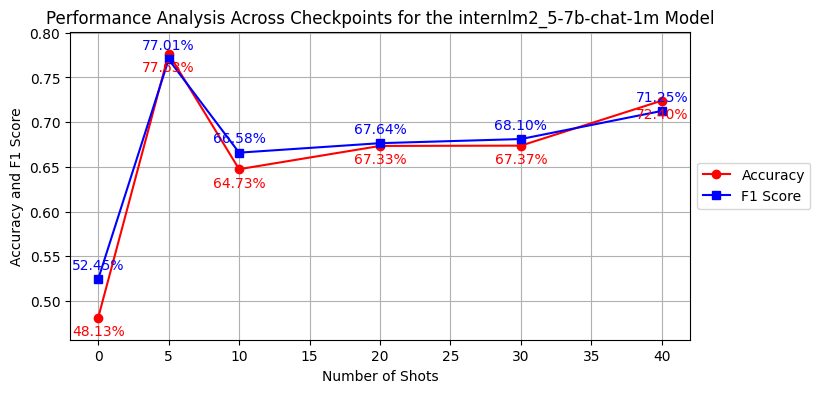

In [49]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [50]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf
不重要         1329
是           1199
不是           468
回答: 是          3
回答: 回答正确       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

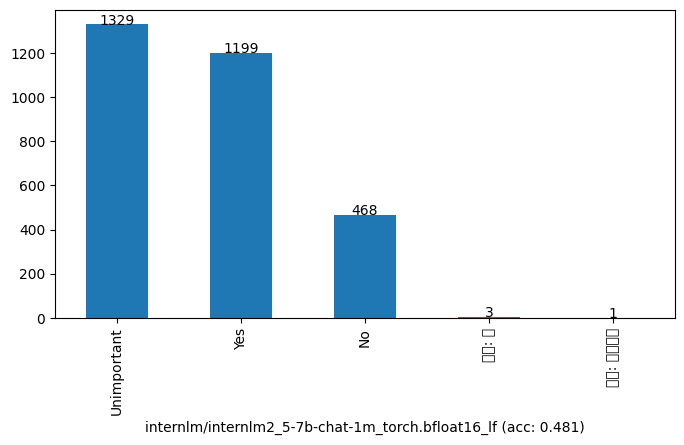

********** internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf
是       1405
不是      1340
不重要      205
回答正确      31
问法错误      19
Name: count, dtype: int64


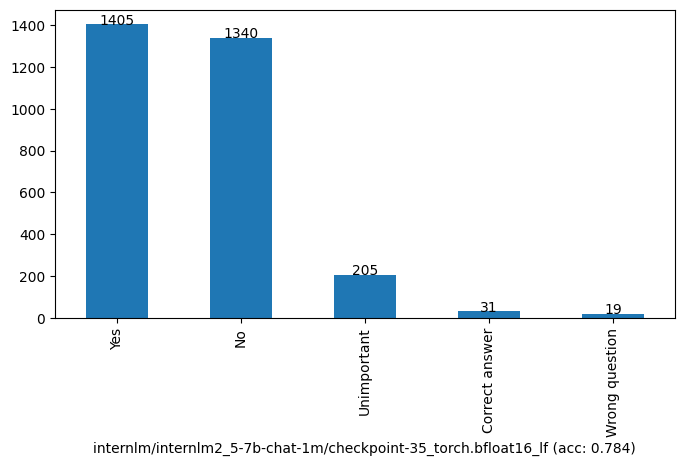

********** internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf
不是      1421
是       1298
不重要      238
回答正确      24
问法错误      19
Name: count, dtype: int64


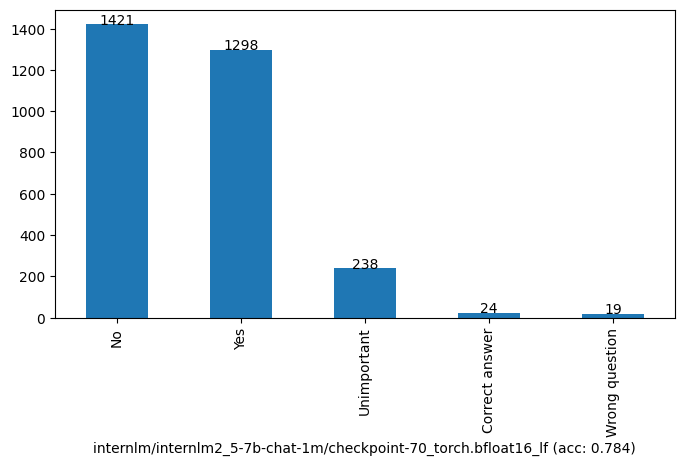

********** internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf
是       1204
不是      1187
不重要      557
回答正确      32
问法错误      20
Name: count, dtype: int64


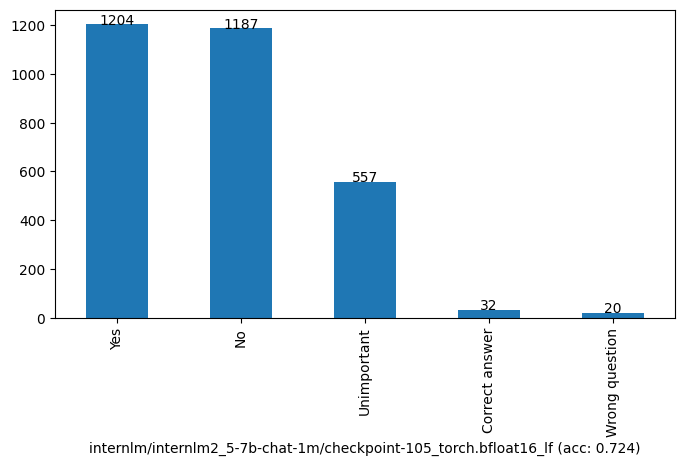

********** internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf
不是      1565
是       1222
不重要      118
问法错误      62
回答正确      33
Name: count, dtype: int64


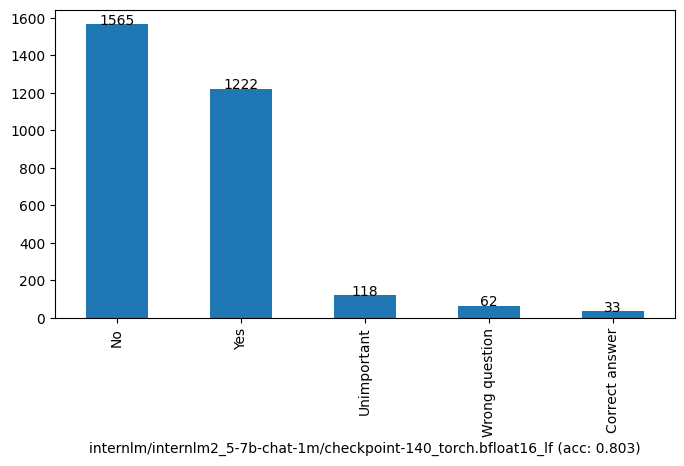

********** internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf
不是      1457
是       1121
不重要      355
问法错误      34
回答正确      33
Name: count, dtype: int64


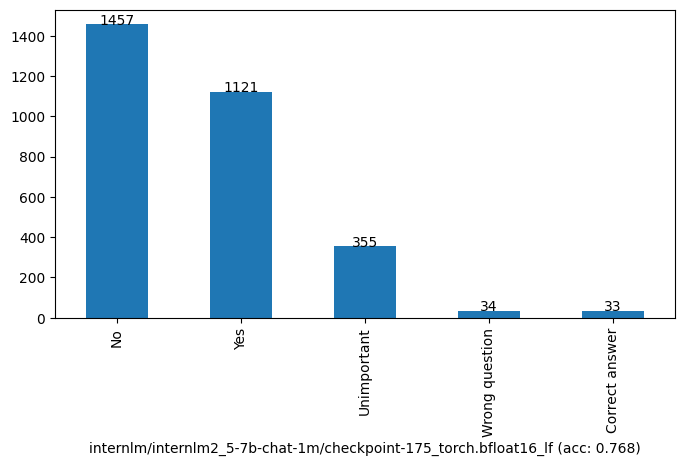

********** internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf
不是      1364
是       1243
不重要      280
问法错误      79
回答正确      34
Name: count, dtype: int64


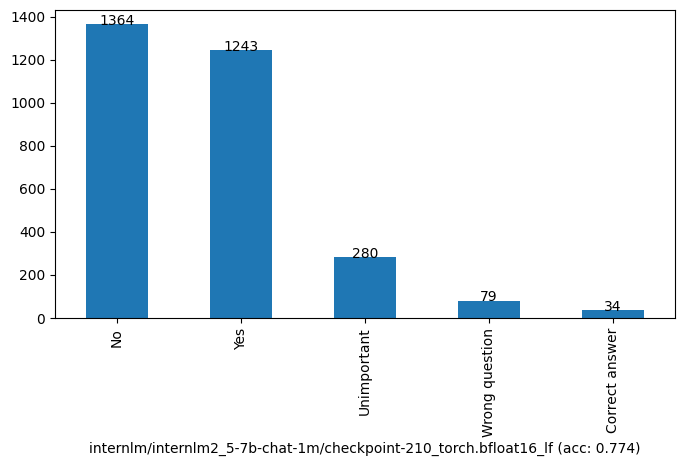

********** internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf
是       1322
不是      1267
不重要      299
问法错误      82
回答正确      30
Name: count, dtype: int64


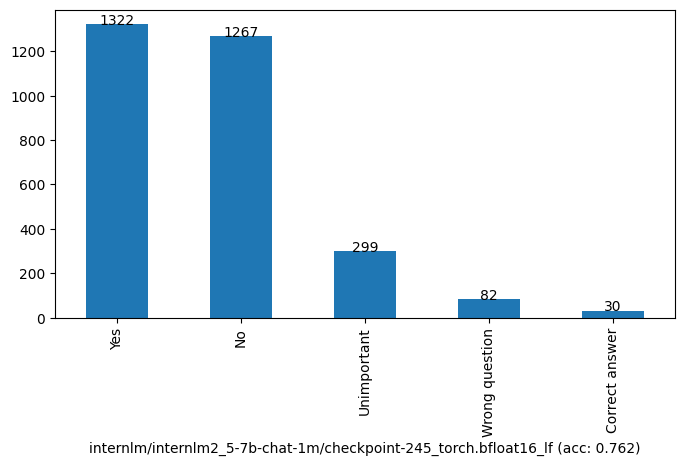

********** internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf
不是      1304
是       1240
不重要      365
问法错误      64
回答正确      27
Name: count, dtype: int64


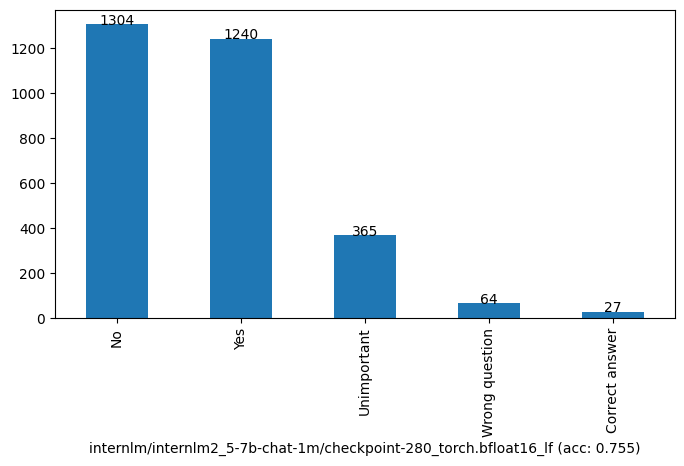

********** internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf
不是      1290
是       1176
不重要      441
问法错误      60
回答正确      33
Name: count, dtype: int64


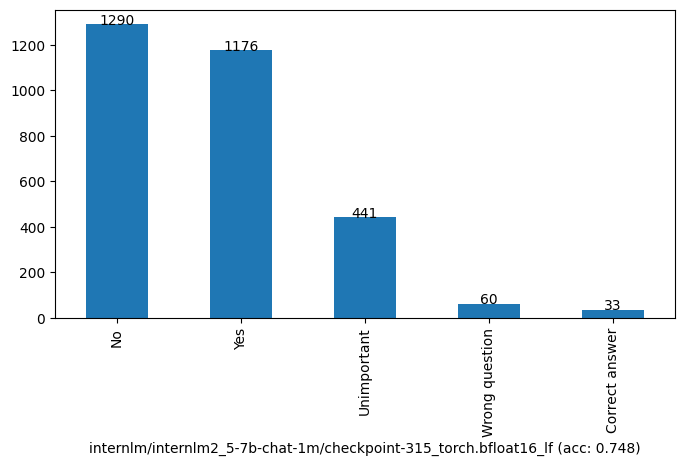

********** internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf
不是      1311
是       1211
不重要      388
问法错误      57
回答正确      33
Name: count, dtype: int64


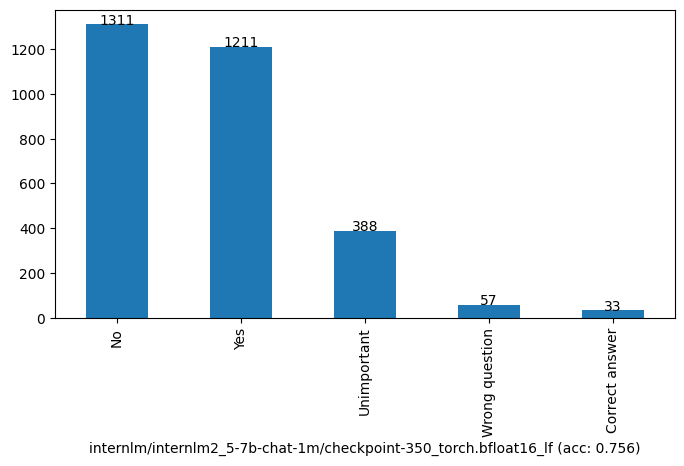

In [51]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf
不重要         1329
是           1199
不是           468
回答: 是          3
回答: 回答正确       1
Name: count, dtype: int64


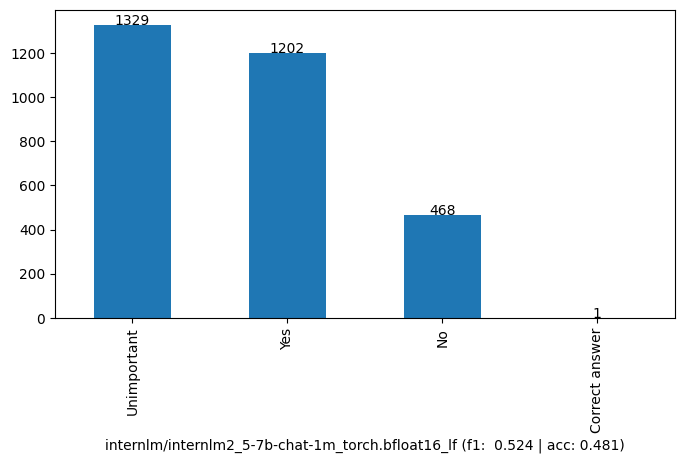

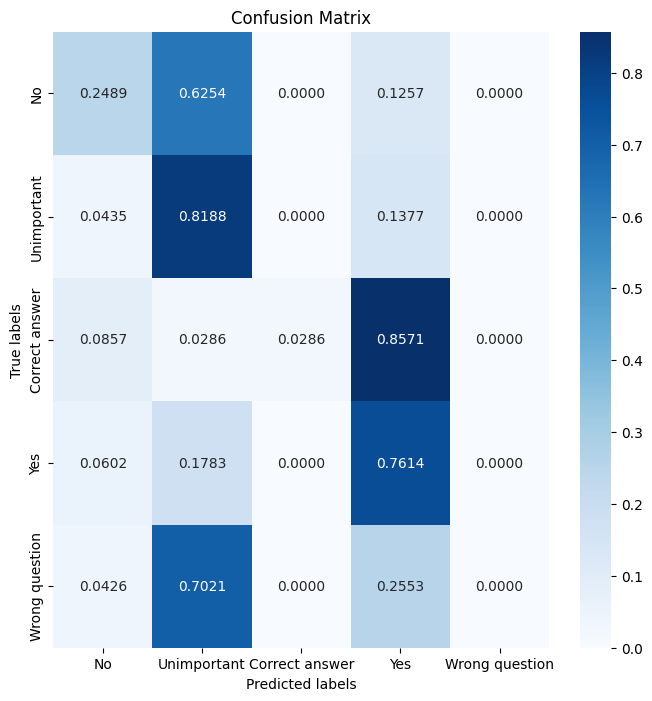

********** internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf
是       1405
不是      1340
不重要      205
回答正确      31
问法错误      19
Name: count, dtype: int64


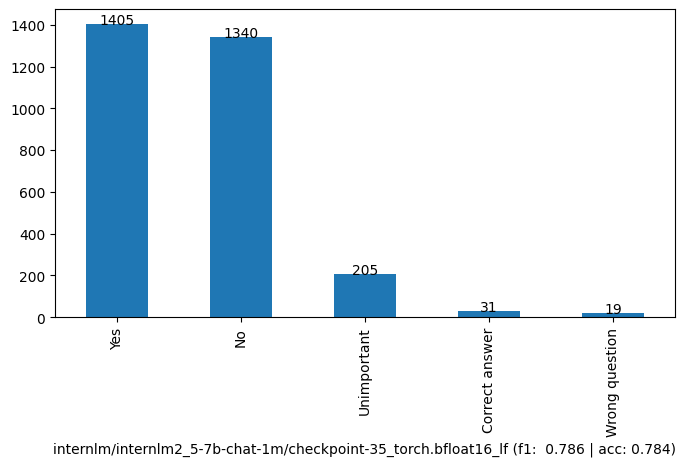

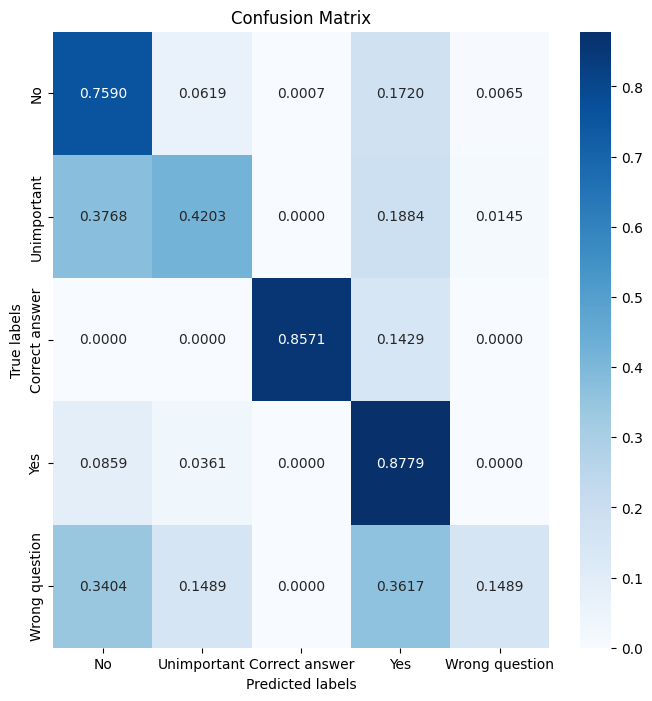

********** internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf
不是      1421
是       1298
不重要      238
回答正确      24
问法错误      19
Name: count, dtype: int64


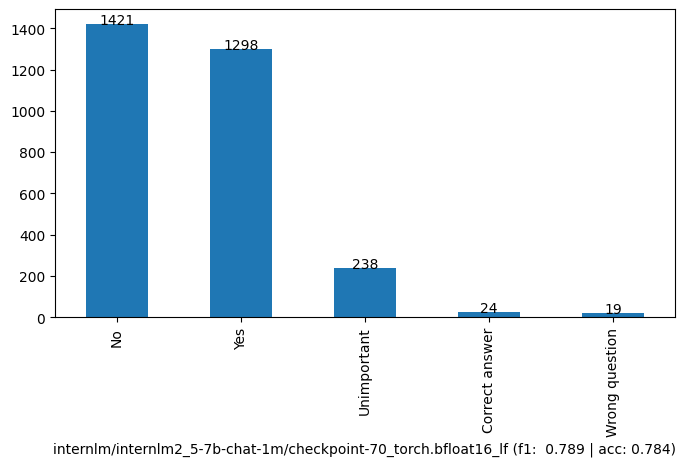

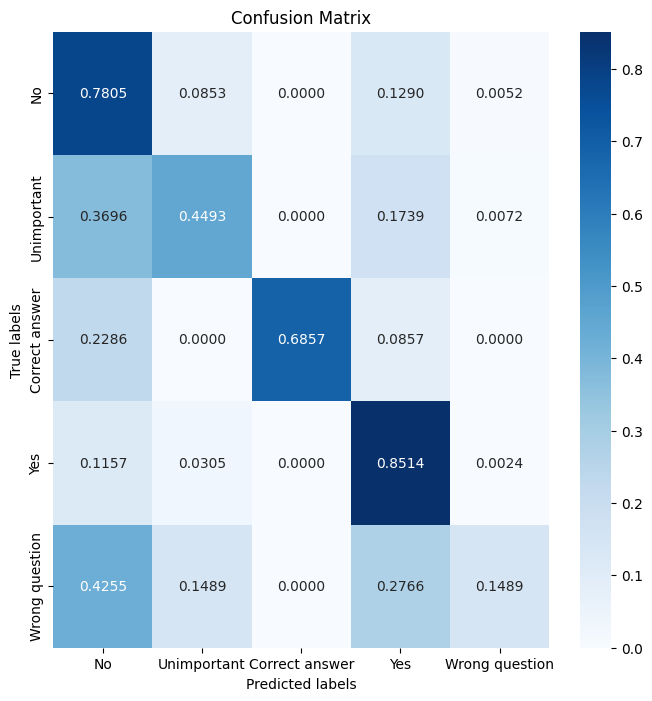

********** internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf
是       1204
不是      1187
不重要      557
回答正确      32
问法错误      20
Name: count, dtype: int64


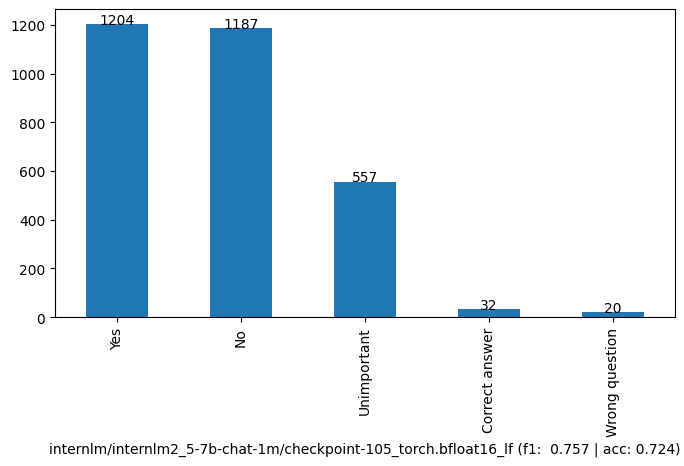

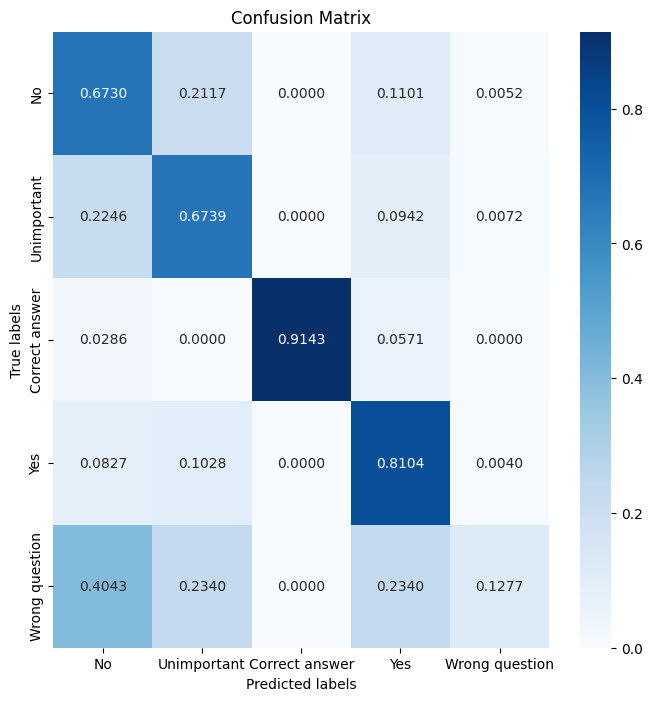

********** internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf
不是      1565
是       1222
不重要      118
问法错误      62
回答正确      33
Name: count, dtype: int64


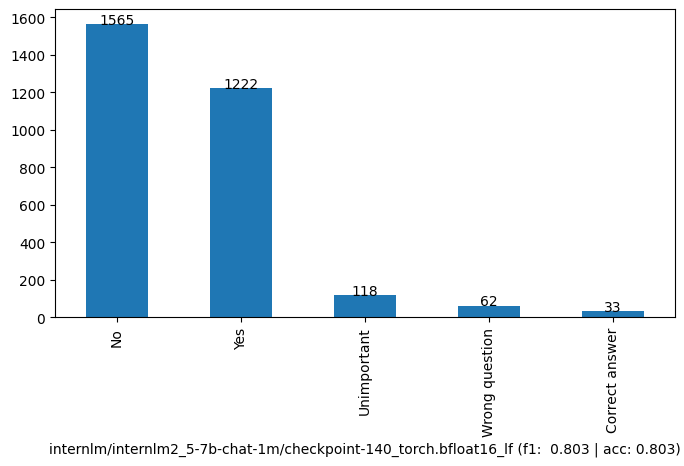

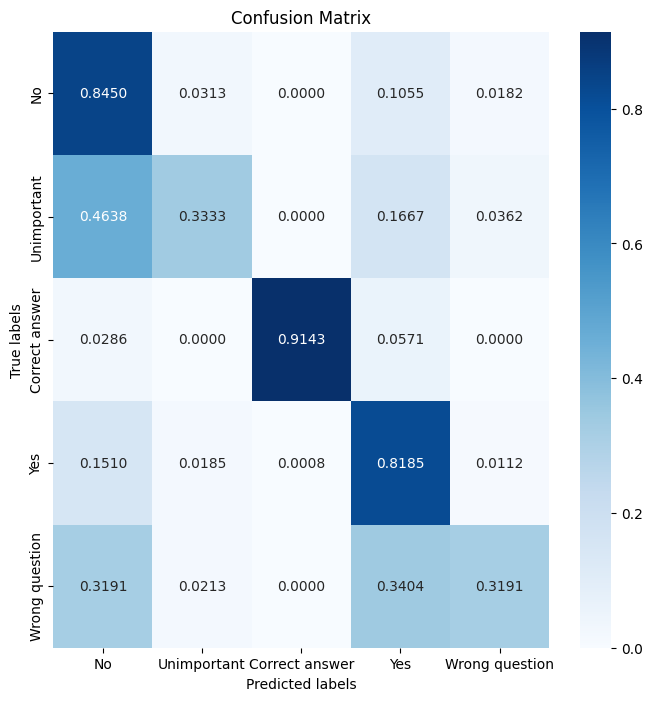

********** internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf
不是      1457
是       1121
不重要      355
问法错误      34
回答正确      33
Name: count, dtype: int64


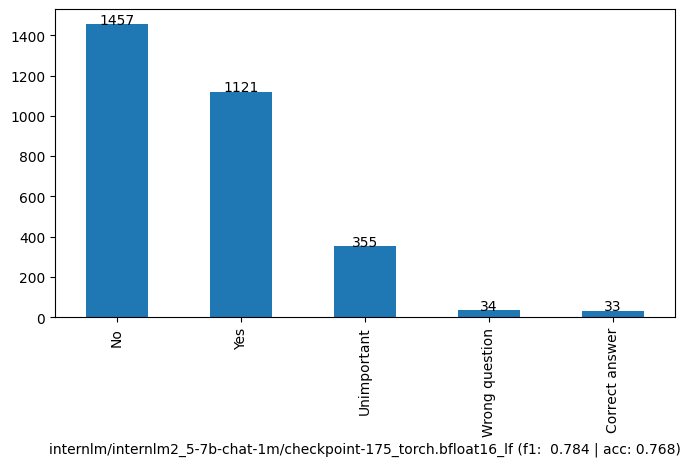

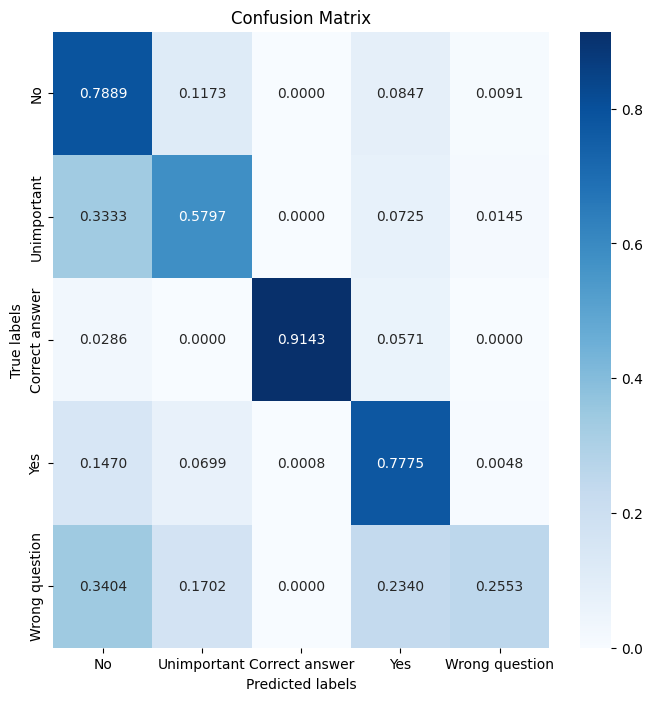

********** internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf
不是      1364
是       1243
不重要      280
问法错误      79
回答正确      34
Name: count, dtype: int64


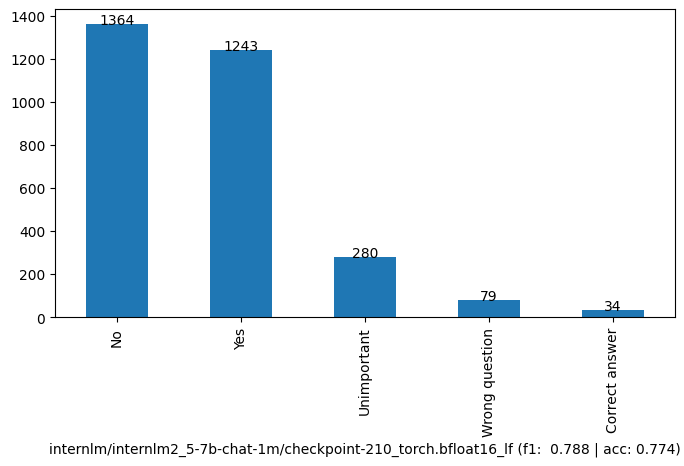

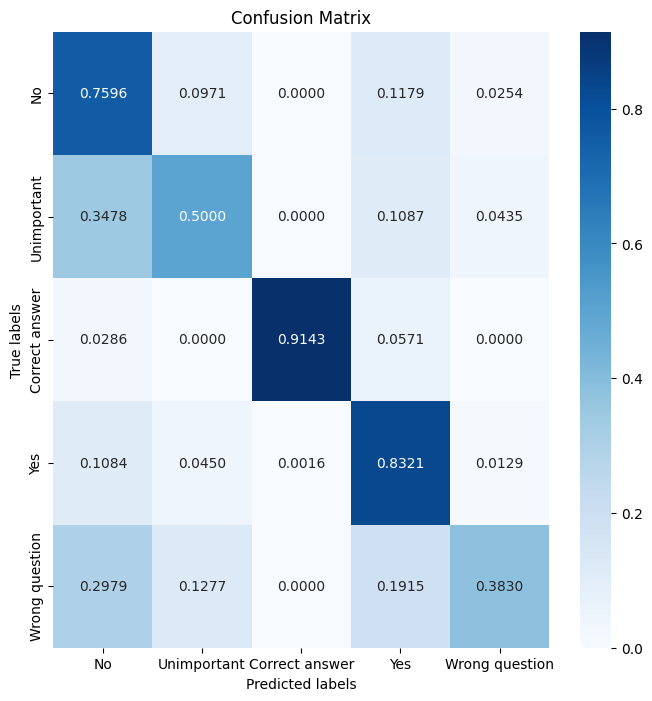

********** internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf
是       1322
不是      1267
不重要      299
问法错误      82
回答正确      30
Name: count, dtype: int64


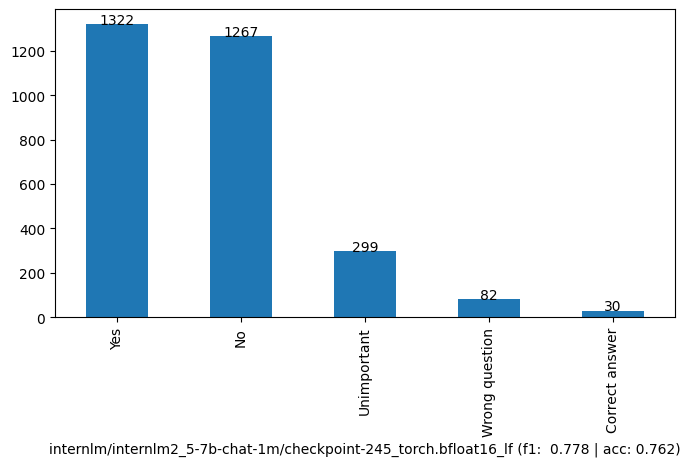

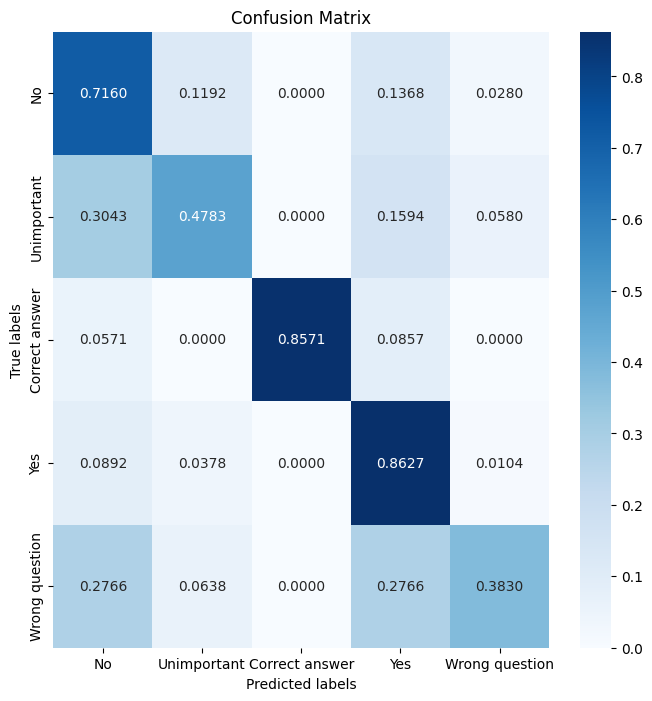

********** internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf
不是      1304
是       1240
不重要      365
问法错误      64
回答正确      27
Name: count, dtype: int64


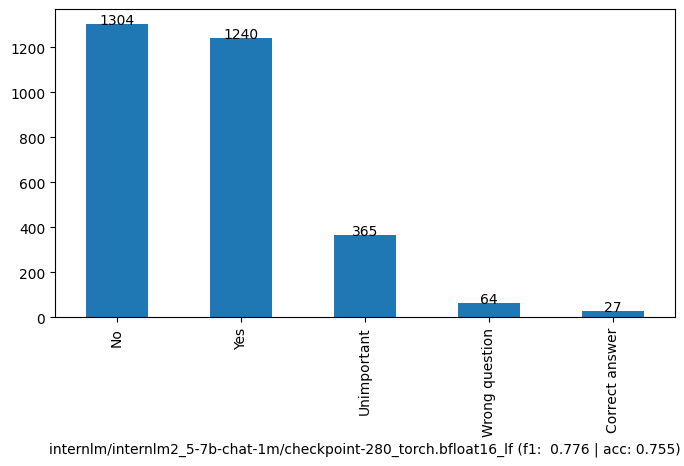

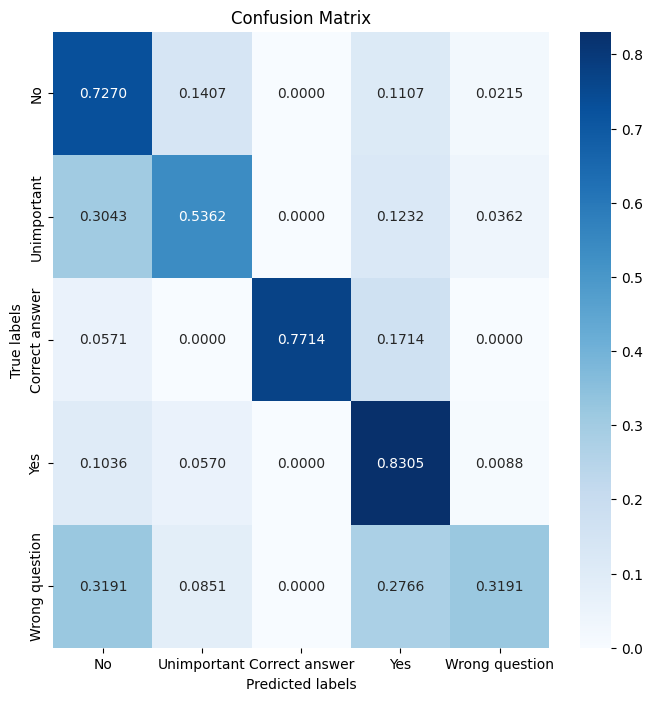

********** internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf
不是      1290
是       1176
不重要      441
问法错误      60
回答正确      33
Name: count, dtype: int64


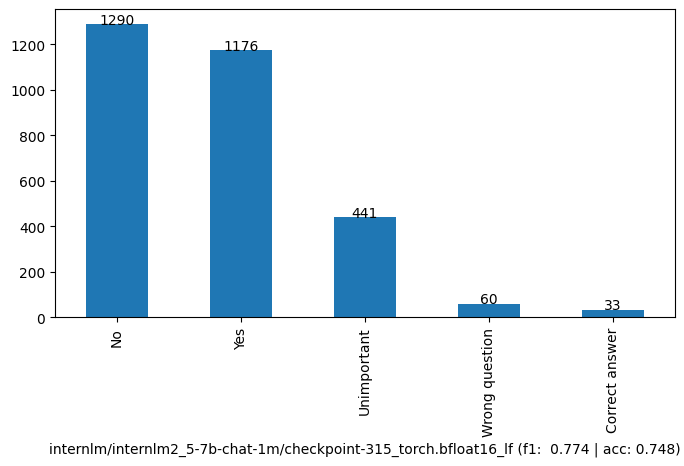

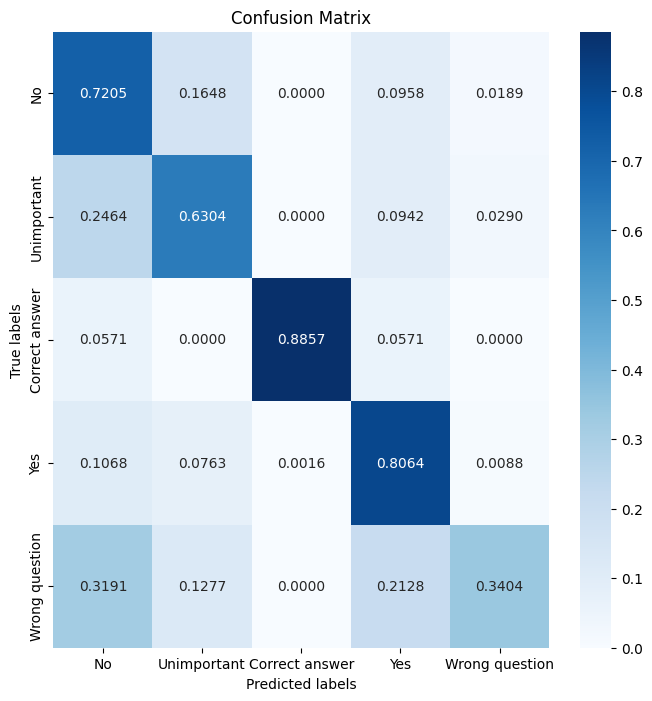

********** internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf
不是      1311
是       1211
不重要      388
问法错误      57
回答正确      33
Name: count, dtype: int64


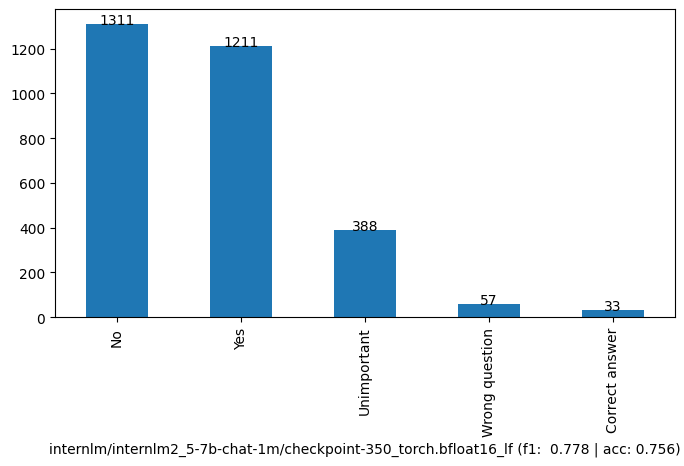

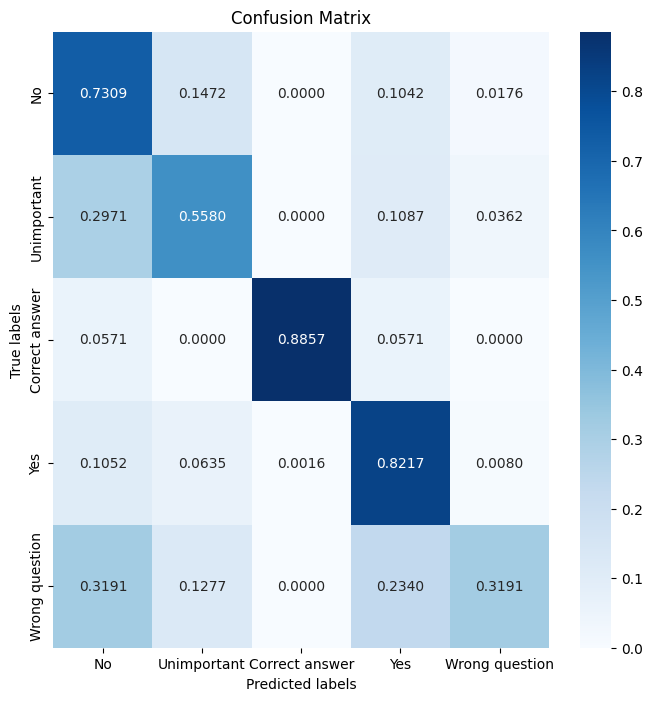

In [52]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** internlm/internlm2_5-7b-chat-1m/shots-00 **********
internlm/internlm2_5-7b-chat-1m/shots-00
不重要         1329
是           1199
不是           468
回答: 是          3
回答: 回答正确       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

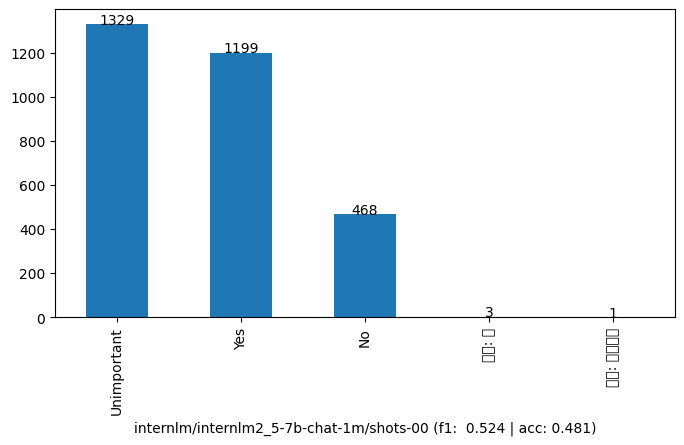

********** internlm/internlm2_5-7b-chat-1m/shots-10 **********
internlm/internlm2_5-7b-chat-1m/shots-10
不是          1709
是            492
不重要          447
回答: 是        285
回答: 回答正确      28
回答: 不重要       21
回答正确          10
回答: 问法错误       6
问法错误           2
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

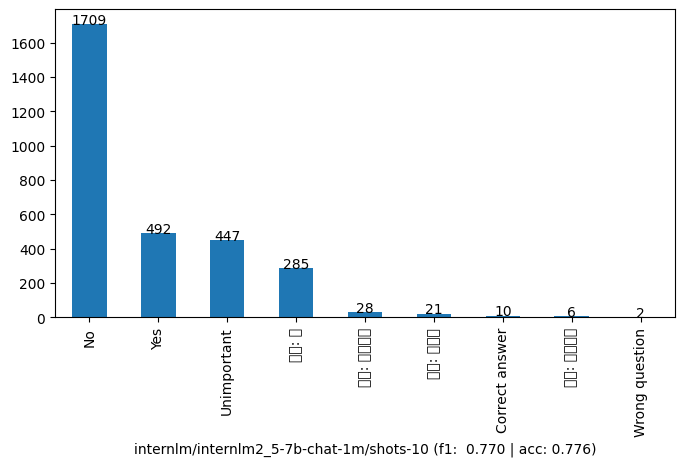

********** internlm/internlm2_5-7b-chat-1m/shots-05 **********
internlm/internlm2_5-7b-chat-1m/shots-05
不是          1582
是           1103
回答: 是        137
不重要          132
回答正确          19
回答: 回答正确      18
回答: 不重要        8
回答: 不是         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

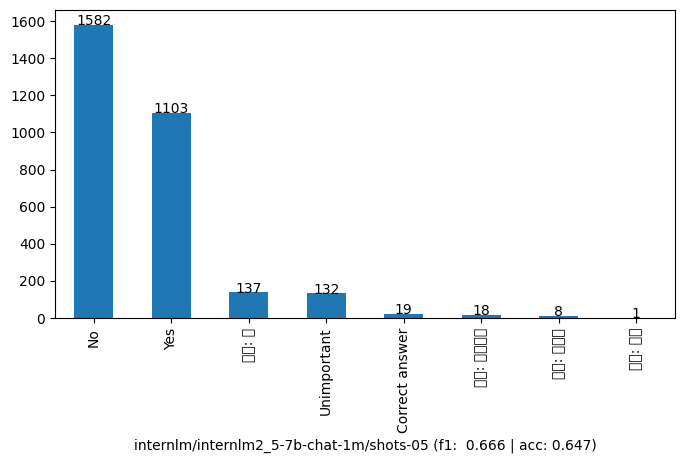

********** internlm/internlm2_5-7b-chat-1m/shots-20 **********
internlm/internlm2_5-7b-chat-1m/shots-20
不是          1872
回答: 是        474
不重要          286
是            279
回答: 回答正确      39
回答正确          23
回答: 不重要       16
回答: 不是         5
问法错误           4
回答: 问法错误       2
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

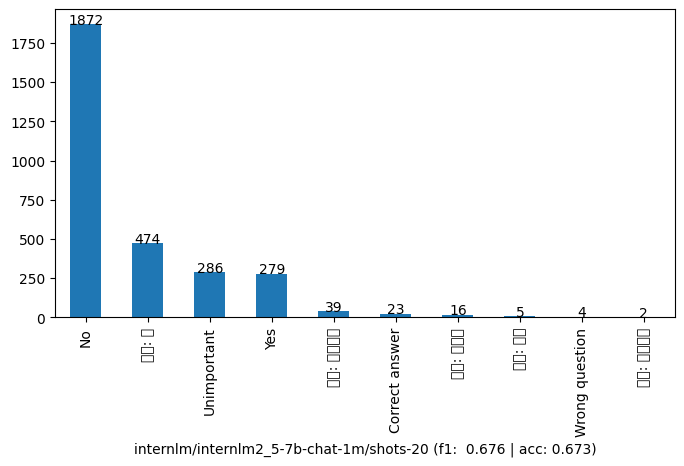

********** internlm/internlm2_5-7b-chat-1m/shots-30 **********
internlm/internlm2_5-7b-chat-1m/shots-30
不是          1785
回答: 是        447
不重要          336
是            325
回答: 不重要       43
回答: 回答正确      30
回答正确          24
回答: 不是         9
问法错误           1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

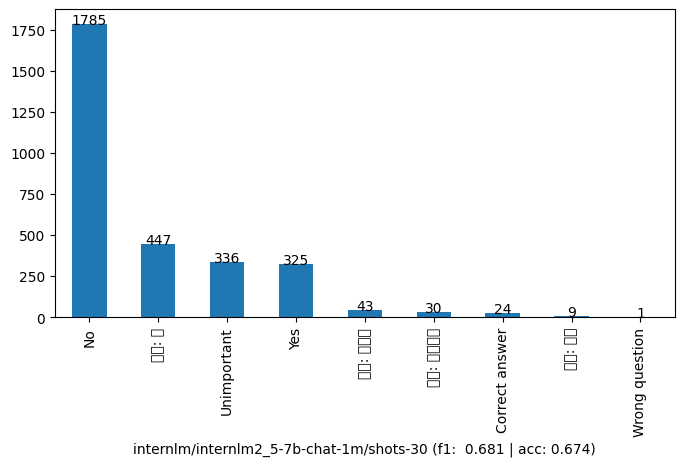

********** internlm/internlm2_5-7b-chat-1m/shots-40 **********
internlm/internlm2_5-7b-chat-1m/shots-40
不是          1963
回答: 是        434
是            376
不重要          129
回答正确          33
回答: 回答正确      26
回答: 不重要       25
回答: 不是        13
回答: 问法错误       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

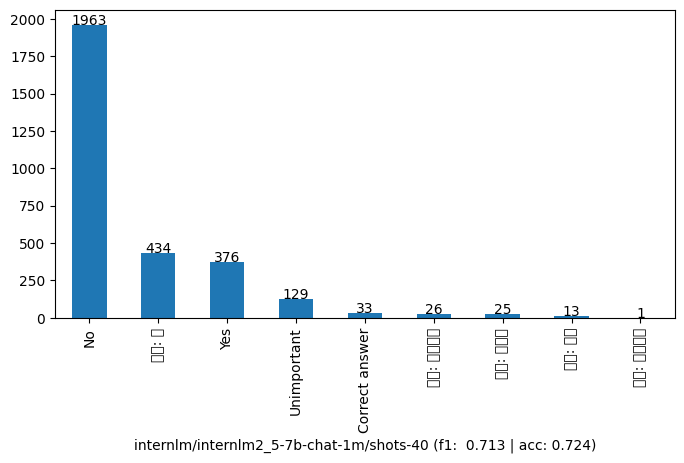

In [53]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** internlm/internlm2_5-7b-chat-1m/shots-00 **********
internlm/internlm2_5-7b-chat-1m/shots-00
不重要         1329
是           1199
不是           468
回答: 是          3
回答: 回答正确       1
Name: count, dtype: int64


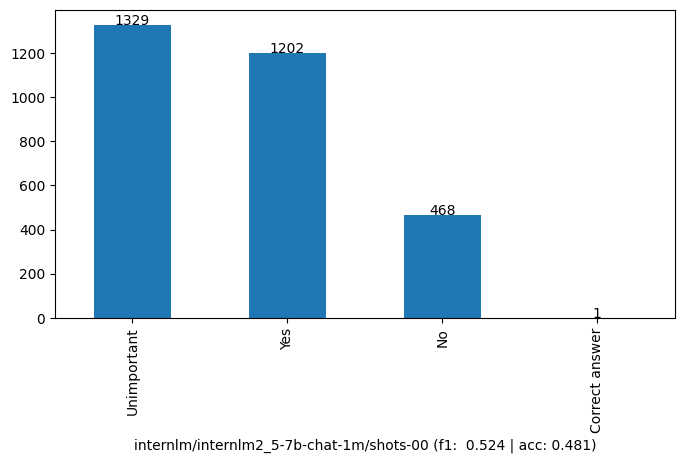

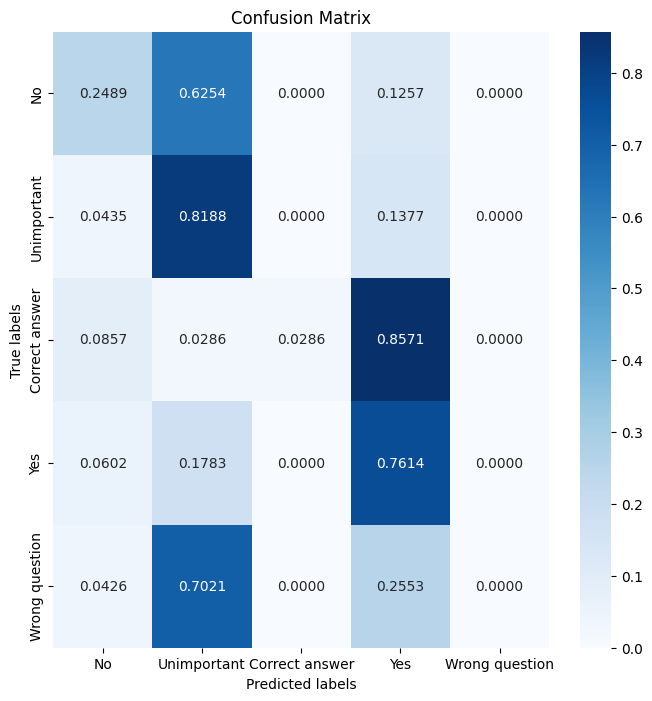

********** internlm/internlm2_5-7b-chat-1m/shots-10 **********
internlm/internlm2_5-7b-chat-1m/shots-10
不是          1709
是            492
不重要          447
回答: 是        285
回答: 回答正确      28
回答: 不重要       21
回答正确          10
回答: 问法错误       6
问法错误           2
Name: count, dtype: int64


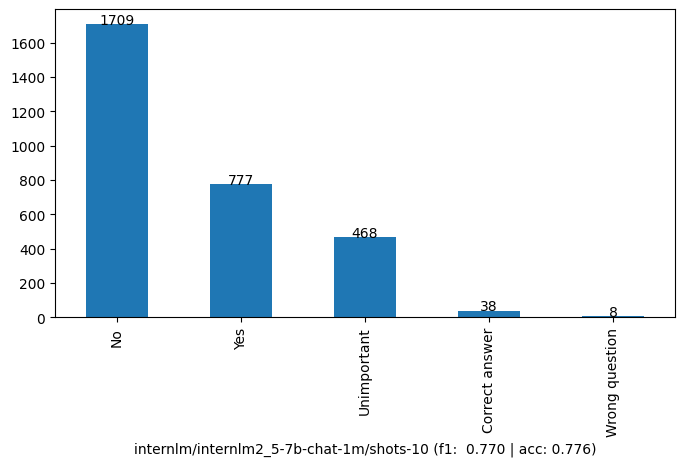

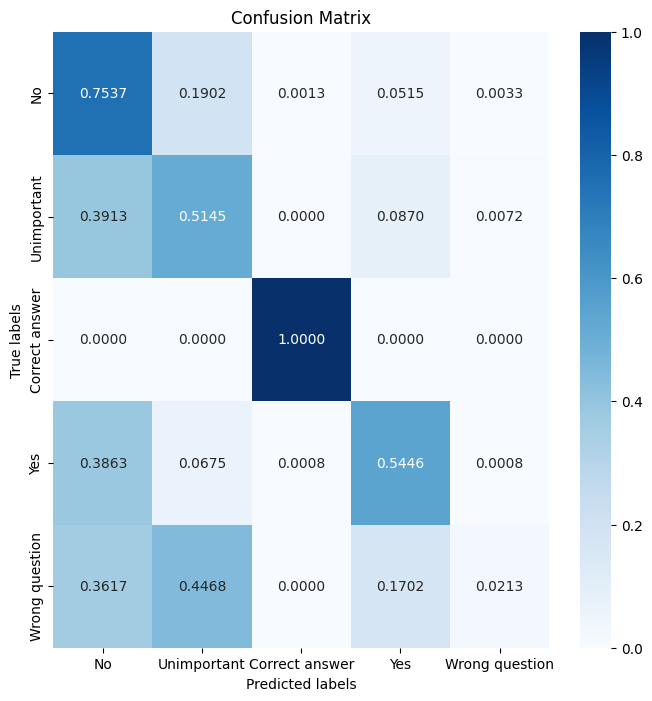

********** internlm/internlm2_5-7b-chat-1m/shots-05 **********
internlm/internlm2_5-7b-chat-1m/shots-05
不是          1582
是           1103
回答: 是        137
不重要          132
回答正确          19
回答: 回答正确      18
回答: 不重要        8
回答: 不是         1
Name: count, dtype: int64


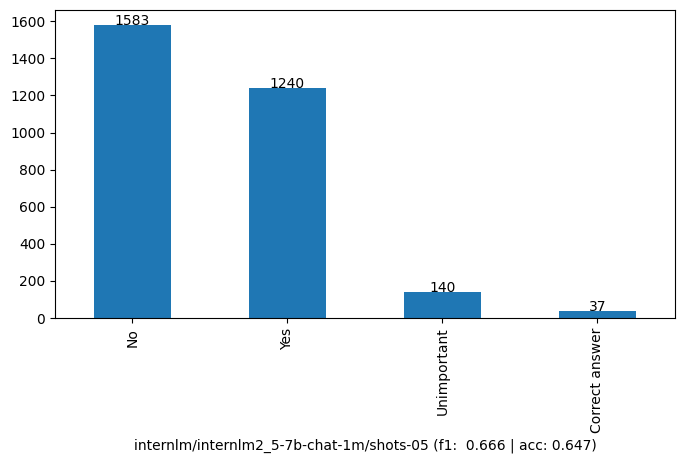

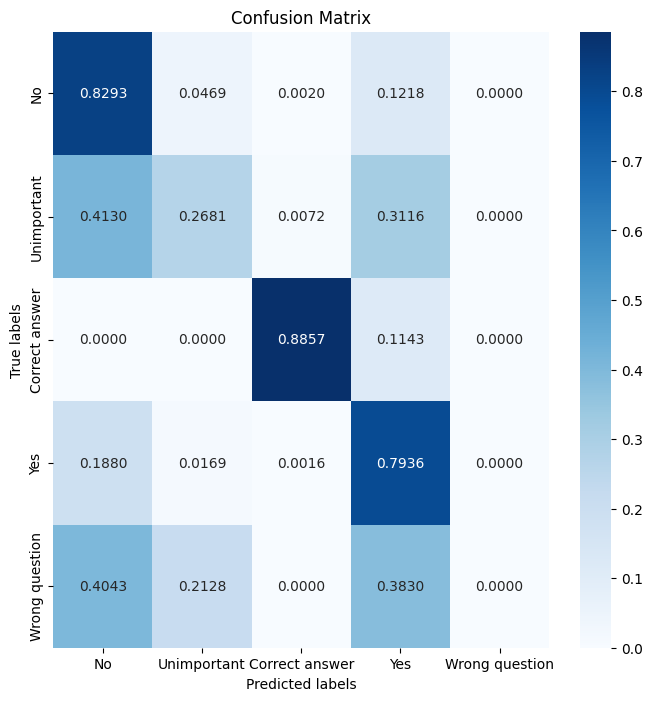

********** internlm/internlm2_5-7b-chat-1m/shots-20 **********
internlm/internlm2_5-7b-chat-1m/shots-20
不是          1872
回答: 是        474
不重要          286
是            279
回答: 回答正确      39
回答正确          23
回答: 不重要       16
回答: 不是         5
问法错误           4
回答: 问法错误       2
Name: count, dtype: int64


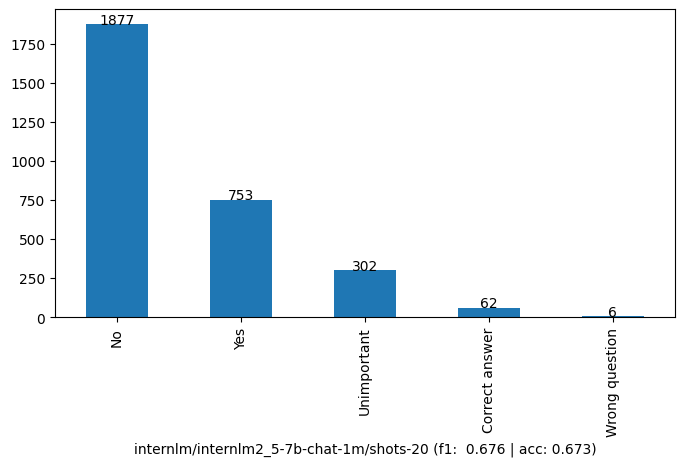

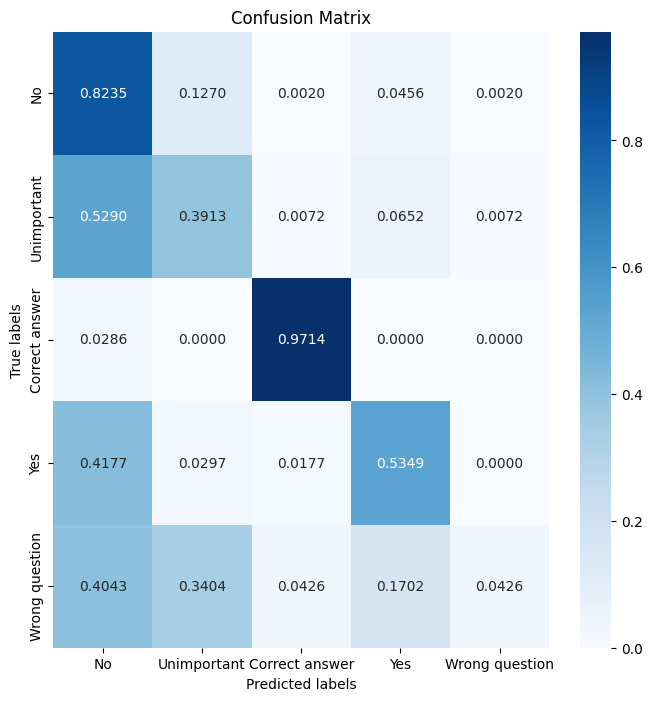

********** internlm/internlm2_5-7b-chat-1m/shots-30 **********
internlm/internlm2_5-7b-chat-1m/shots-30
不是          1785
回答: 是        447
不重要          336
是            325
回答: 不重要       43
回答: 回答正确      30
回答正确          24
回答: 不是         9
问法错误           1
Name: count, dtype: int64


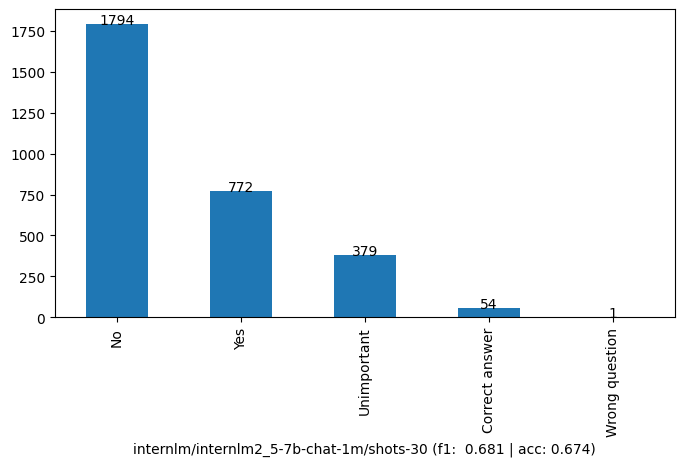

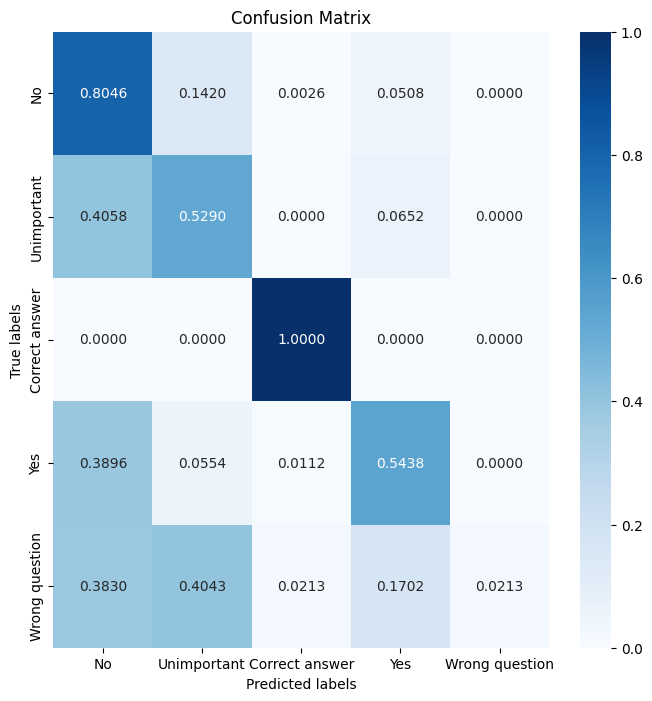

********** internlm/internlm2_5-7b-chat-1m/shots-40 **********
internlm/internlm2_5-7b-chat-1m/shots-40
不是          1963
回答: 是        434
是            376
不重要          129
回答正确          33
回答: 回答正确      26
回答: 不重要       25
回答: 不是        13
回答: 问法错误       1
Name: count, dtype: int64


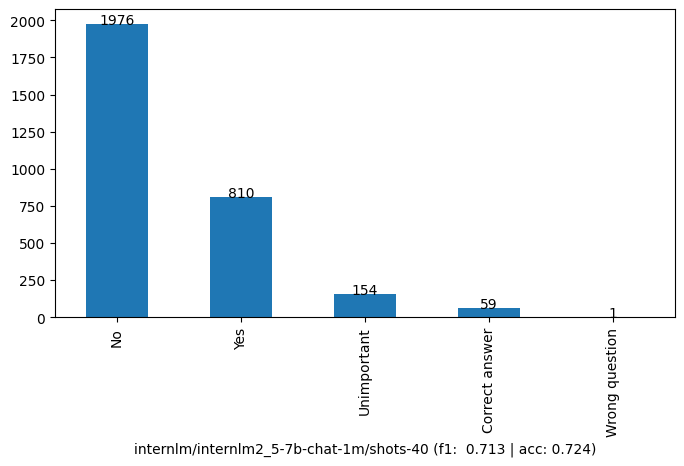

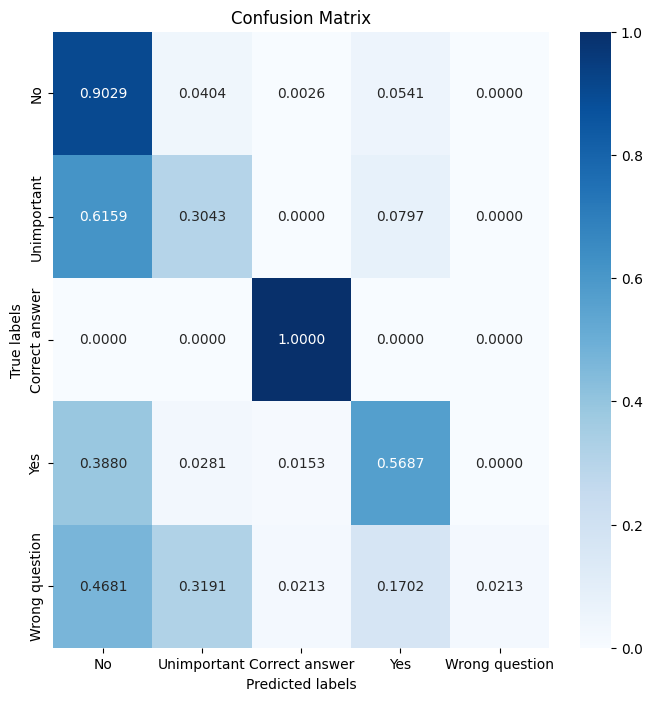

In [54]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )